# Exploratory Data Analysis for Rossmann Pharmaceuticals

This notebook aims to explore customer purchasing behavior across various stores by analyzing sales data, promotions, and other factors affecting sales.

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

### Logger Configuration

In [3]:
"configer the logger   "                                                                     # Configure logging
logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    handlers=[logging.FileHandler("analysis.log"), logging.StreamHandler()])

### Data Loading and Merging

In [4]:
import pandas as pd
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    handlers=[logging.FileHandler("analysis.log"), logging.StreamHandler()])

# Log the start of the analysis
logging.info("Starting the customer purchasing behavior analysis.")

# Load the datasets
try:
    train_data = pd.read_csv('../data/train.csv', low_memory=False)
    logging.info("Loaded training data successfully.")
except FileNotFoundError:
    logging.error("Training data file not found.")
    
try:
    test_data = pd.read_csv('../data/test.csv', low_memory=False)
    logging.info("Loaded test data successfully.")
except FileNotFoundError:
    logging.error("Test data file not found.")

try:
    store_data = pd.read_csv('../data/store.csv', low_memory=False)
    logging.info("Loaded store data successfully.")
except FileNotFoundError:
    logging.error("Store data file not found.")

# Merge the training data with the store data
merged_data = pd.merge(train_data, store_data, on='Store', how='left')
logging.info("Merged training data with store data.")

# Display the first few rows of the merged data
logging.info("First few rows of merged data:\n%s", merged_data.head())

2025-01-04 04:43:16,941 - INFO - Starting the customer purchasing behavior analysis.
2025-01-04 04:43:17,318 - INFO - Loaded training data successfully.
2025-01-04 04:43:17,333 - INFO - Loaded test data successfully.
2025-01-04 04:43:17,337 - INFO - Loaded store data successfully.
2025-01-04 04:43:17,432 - INFO - Merged training data with store data.
2025-01-04 04:43:17,433 - INFO - First few rows of merged data:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a         

### Data Preprocessing and Model Training

In [6]:
import pandas as pd
import logging

# Assuming logging has already been configured

# Check for missing values
missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()

# Log missing values
logging.info("Missing values in training data:\n%s", missing_train[missing_train > 0])
logging.info("Missing values in test data:\n%s", missing_test[missing_test > 0])

# Check for duplicates
duplicates_train = train_data.duplicated().sum()
duplicates_test = test_data.duplicated().sum()

logging.info(f"Duplicates in training data: {duplicates_train}")
logging.info(f"Duplicates in test data: {duplicates_test}")

# Handle missing values (example: drop rows with missing target variable 'Sales')
train_data.dropna(subset=['Sales'], inplace=True)
logging.info("Dropped rows with missing target variable 'Sales'.")

# Handle outliers (example: using IQR method)
Q1 = train_data['Sales'].quantile(0.25)
Q3 = train_data['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
train_data = train_data[(train_data['Sales'] >= lower_bound) & (train_data['Sales'] <= upper_bound)]
logging.info("Removed outliers from training data.")

# Check data types
logging.info("Data types in training data:\n%s", train_data.dtypes)
logging.info("Data types in test data:\n%s", test_data.dtypes)

# Convert data types if necessary (example: convert 'Date' to datetime)
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])
logging.info("Converted 'Date' columns to datetime format.")

2025-01-04 04:45:23,233 - INFO - Missing values in training data:
Series([], dtype: int64)
2025-01-04 04:45:23,235 - INFO - Missing values in test data:
Open    11
dtype: int64
2025-01-04 04:45:23,406 - INFO - Duplicates in training data: 0
2025-01-04 04:45:23,406 - INFO - Duplicates in test data: 0
2025-01-04 04:45:23,429 - INFO - Dropped rows with missing target variable 'Sales'.
2025-01-04 04:45:23,486 - INFO - Removed outliers from training data.
2025-01-04 04:45:23,487 - INFO - Data types in training data:
Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object
2025-01-04 04:45:23,488 - INFO - Data types in test data:
Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      i

### Handling Missing Values and Data Type Conversion

In [5]:
# Handle missing values in test data
test_data['Open'].fillna(1, inplace=True)  # Assuming missing means the store is open

# Convert 'Open' column to int
test_data['Open'] = test_data['Open'].astype(int)

# Verify changes
print("\nMissing values in test data after handling:\n", test_data.isnull().sum())
print("\nData types in test data after conversion:\n", test_data.dtypes)


Missing values in test data after handling:
 Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Data types in test data after conversion:
 Id                        int64
Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object


/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_4568/1338748617.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Open'].fillna(1, inplace=True)  # Assuming missing means the store is open


## Exploratory_data_analysis

### Visualize Distribution of Promotions: 
Check if promotions are distributed similarly between training and test sets.

2025-01-04 06:02:35,583 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-04 06:02:35,826 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-04 06:02:35,946 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-04 06:02:35,957 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


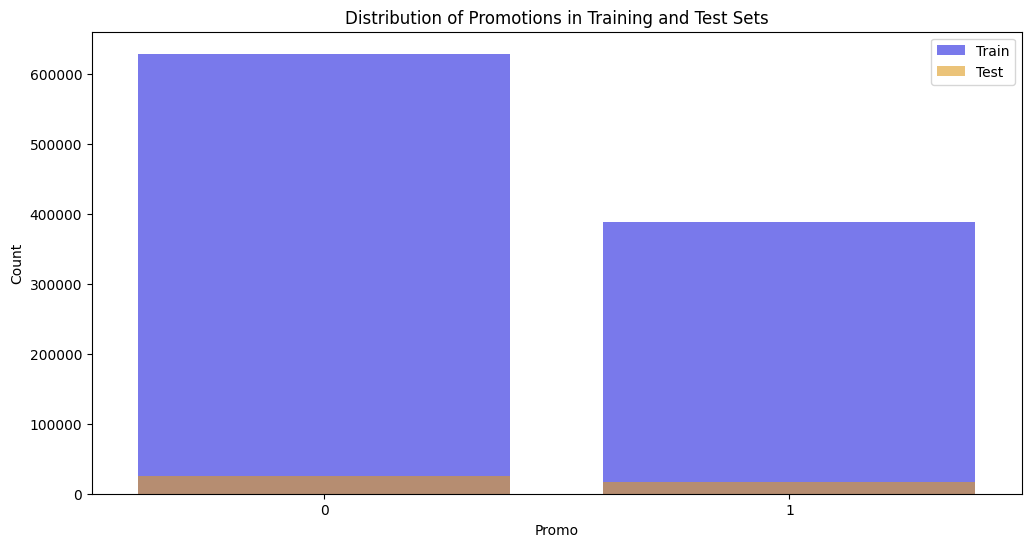

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Promo', data=train_data, color='blue', alpha=0.6, label='Train')
sns.countplot(x='Promo', data=test_data, color='orange', alpha=0.6, label='Test')
plt.title('Distribution of Promotions in Training and Test Sets')
plt.xlabel('Promo')
plt.ylabel('Count')
plt.legend()
plt.show()

### Analyze Sales Behavior Around Holidays 
Analyze sales behavior before, during, and after holidays.

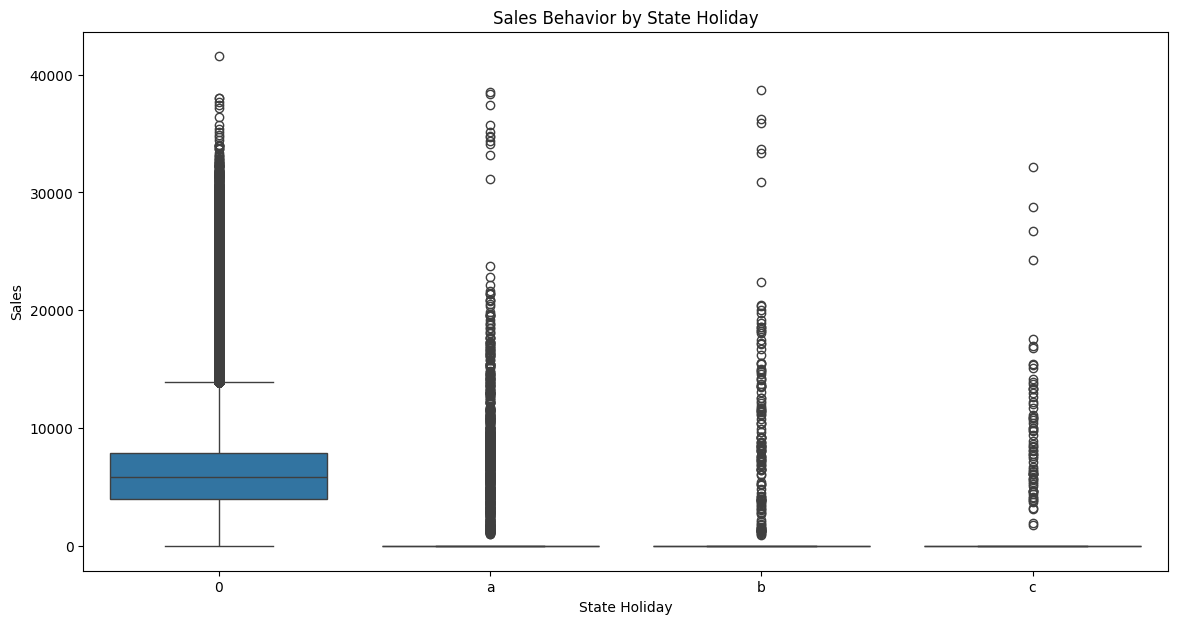

In [30]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='StateHoliday', y='Sales', data=train_data)
plt.title('Sales Behavior by State Holiday')
plt.xlabel('State Holiday')
plt.ylabel('Sales')
plt.show()

### Seasonal Purchase Behaviors
Investigate seasonal trends (e.g., Christmas, Easter).

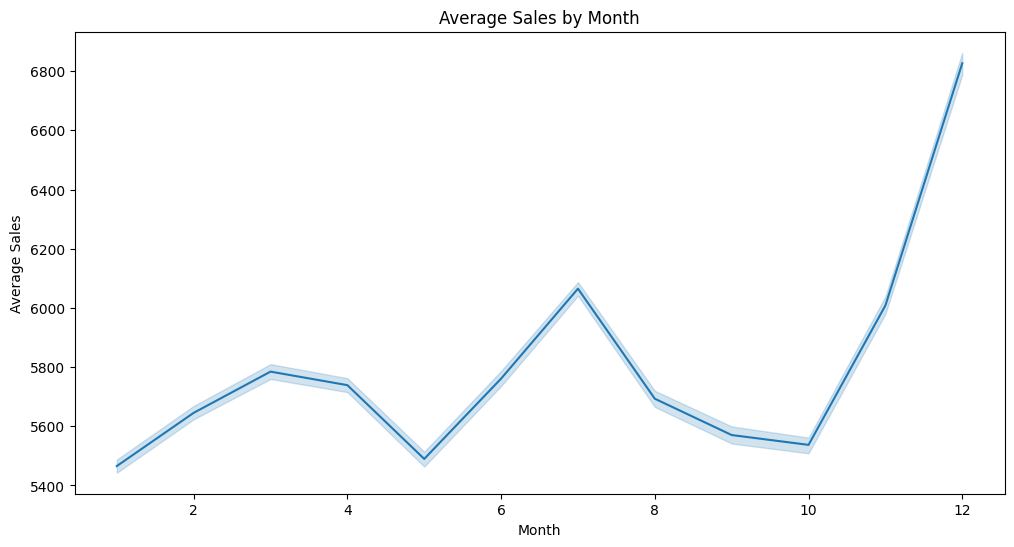

In [29]:
import pandas as pd

# Load the training data
train_data = pd.read_csv('../data/train.csv', low_memory=False)



# Ensure the 'Date' column exists and strip any whitespace
train_data.rename(columns=lambda x: x.strip(), inplace=True)

# Convert the 'Date' column to datetime format
if 'Date' in train_data.columns:
    train_data['Date'] = pd.to_datetime(train_data['Date'], errors='coerce')

    # Now you can extract the month
    train_data['Month'] = train_data['Date'].dt.month

    # Proceed with your plotting
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Month', y='Sales', data=train_data, estimator='mean')
    plt.title('Average Sales by Month')
    plt.xlabel('Month')
    plt.ylabel('Average Sales')
    plt.show()
else:
    print("The 'Date' column does not exist in the training data.")

### Correlation Between Sales and Customers
Explore the relationship between sales and the number of customers.

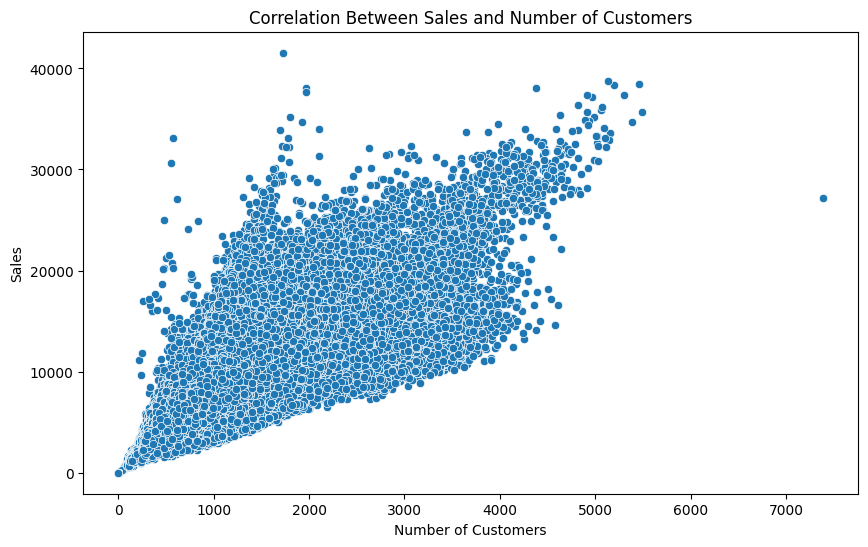

Correlation coefficient between Sales and Customers: 0.89


In [25]:
# Correlation between Sales and Customers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=train_data)
plt.title('Correlation Between Sales and Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

# Calculate and display the correlation coefficient
correlation = train_data['Sales'].corr(train_data['Customers'])
print(f"Correlation coefficient between Sales and Customers: {correlation:.2f}")

### Impact of Promotions on Sales
Analyze how promotions affect sales and customer behavior.


2025-01-04 05:52:45,596 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-04 05:52:45,833 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


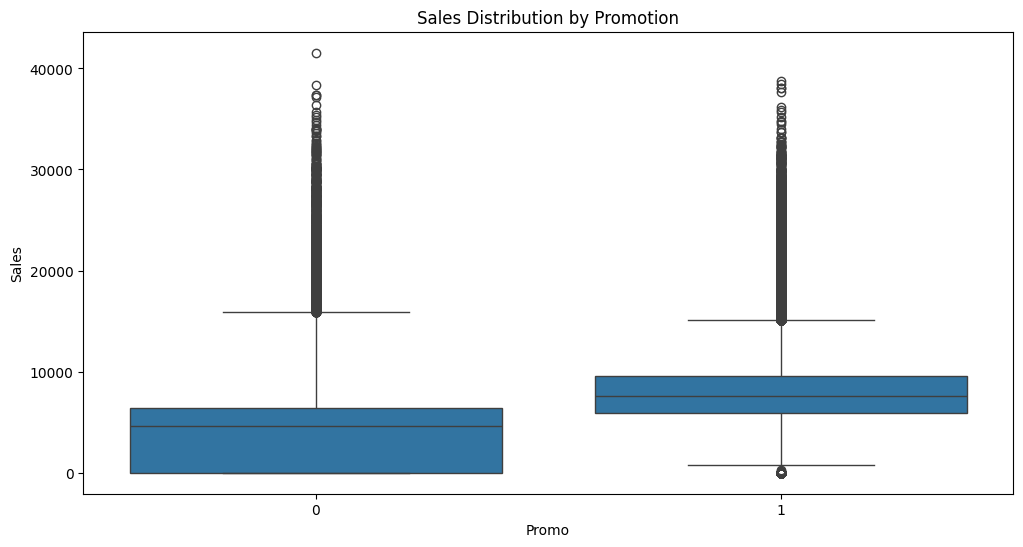

Average Customers with Promo: 820.10
Average Customers without Promo: 517.82


In [24]:
# Impact of promotions on sales
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promo', y='Sales', data=train_data)
plt.title('Sales Distribution by Promotion')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.show()

# Analyze the average number of customers with and without promotions
avg_customers_with_promo = train_data[train_data['Promo'] == 1]['Customers'].mean()
avg_customers_without_promo = train_data[train_data['Promo'] == 0]['Customers'].mean()

print(f"Average Customers with Promo: {avg_customers_with_promo:.2f}")
print(f"Average Customers without Promo: {avg_customers_without_promo:.2f}")

### Store Opening and Closing Times
Examine trends in customer behavior during store opening and closing times.

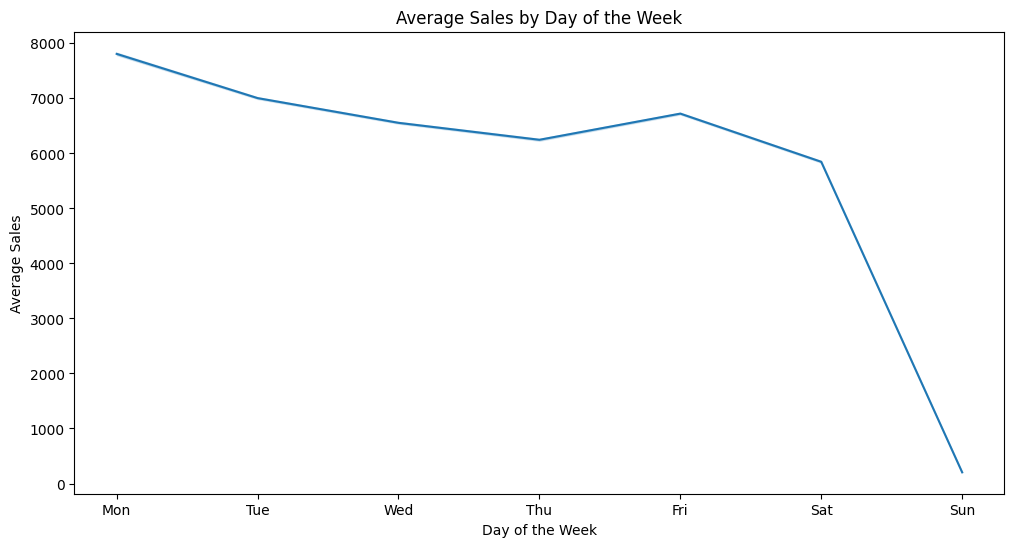

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='DayOfWeek', y='Sales', data=train_data, estimator='mean')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

### Assortment Type Effect on Sales
Investigate how the assortment type affects sales.


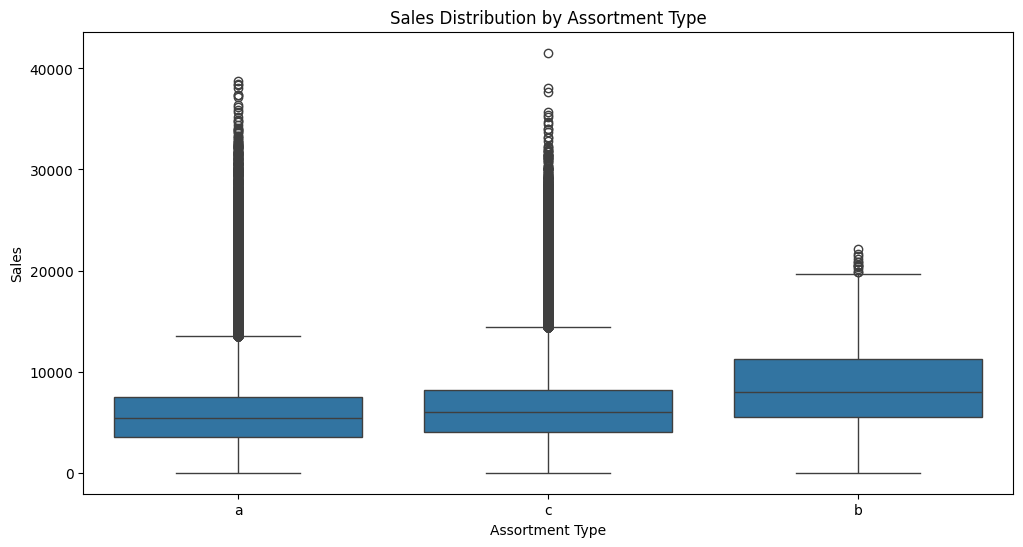

In [22]:
# Assortment Type Effect on Sales
plt.figure(figsize=(12, 6))
sns.boxplot(x='Assortment', y='Sales', data=merged_data)
plt.title('Sales Distribution by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Sales')
plt.show()



###  Competitor Distance Analysis
Assess the impact of competitor distance on sales.

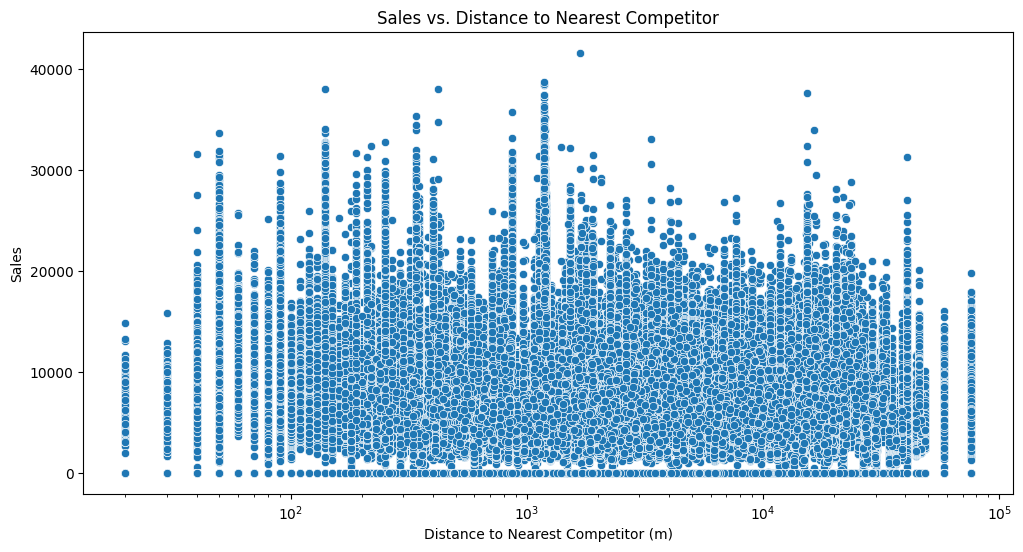

Correlation coefficient between Sales and Competition Distance: -0.02


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming merged_data is already defined and contains the necessary data

# Analyze the effect of competitor distance on sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=merged_data)
plt.title('Sales vs. Distance to Nearest Competitor')
plt.xlabel('Distance to Nearest Competitor (m)')
plt.ylabel('Sales')
plt.xscale('log')  # Use log scale for better visualization
plt.show()

# Additional Analysis: Correlation between Sales and CompetitionDistance
correlation_distance = merged_data['Sales'].corr(merged_data['CompetitionDistance'].fillna(0))  # Fill NA for correlation
print(f"Correlation coefficient between Sales and Competition Distance: {correlation_distance:.2f}")

### Model Training , Evaluation and     Prediction

In [16]:
import pandas as pd
import logging
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Configure logging
logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    handlers=[logging.FileHandler("analysis.log"), logging.StreamHandler()])

# Load the datasets
try:
    train_data = pd.read_csv('../data/train.csv', low_memory=False)
    logging.info("Loaded training data successfully.")
except FileNotFoundError:
    logging.error("Training data file not found.")

try:
    test_data = pd.read_csv('../data/test.csv', low_memory=False)
    logging.info("Loaded test data successfully.")
except FileNotFoundError:
    logging.error("Test data file not found.")

# Check column names
logging.info("Train Data Columns: %s", train_data.columns.tolist())
logging.info("Test Data Columns: %s", test_data.columns.tolist())

# Convert 'Date' to datetime if the column exists
if 'Date' in train_data.columns:
    train_data['Date'] = pd.to_datetime(train_data['Date'])
if 'Date' in test_data.columns:
    test_data['Date'] = pd.to_datetime(test_data['Date'])

# Convert datetime columns to numerical features
if 'Date' in train_data.columns:
    train_data['Year'] = train_data['Date'].dt.year
    train_data['Month'] = train_data['Date'].dt.month
    train_data['Day'] = train_data['Date'].dt.day

if 'Date' in test_data.columns:
    test_data['Year'] = test_data['Date'].dt.year
    test_data['Month'] = test_data['Date'].dt.month
    test_data['Day'] = test_data['Date'].dt.day

# Drop the original 'Date' column if it's no longer needed
train_data.drop('Date', axis=1, inplace=True, errors='ignore')
test_data.drop('Date', axis=1, inplace=True, errors='ignore')

# Identify categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical variables
train_data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)
test_data = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)

# Align train and test data (in case of different categories)
train_data, test_data = train_data.align(test_data, join='left', axis=1, fill_value=0)

# Ensure target column is not present in test_data
if 'Sales' in test_data.columns:
    test_data.drop('Sales', axis=1, inplace=True)

# Step 1: Define features and target variable
X = train_data.drop('Sales', axis=1)  # Features
y = train_data['Sales']              # Target variable

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
model = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
logging.info("Model training completed.")

# Step 4: Make predictions on the validation set
val_predictions = model.predict(X_val)

# Step 5: Evaluate the model
mae = mean_absolute_error(y_val, val_predictions)
logging.info(f'Mean Absolute Error: {mae}')

# Step 6: Align test_data columns to match training features
logging.info("Aligning test_data columns with training features...")
test_data = test_data[X_train.columns]  # Align test data with training features
logging.debug(f"Training features: {X_train.columns.tolist()}")
logging.debug(f"Test features: {test_data.columns.tolist()}")

# Make predictions on the test data
test_predictions = model.predict(test_data)
logging.info("Predictions on test data completed.")

2025-01-04 05:06:36,708 - INFO - Loaded training data successfully.
2025-01-04 05:06:36,723 - INFO - Loaded test data successfully.
2025-01-04 05:06:36,724 - INFO - Train Data Columns: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
2025-01-04 05:06:36,724 - INFO - Test Data Columns: ['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
2025-01-04 05:06:43,335 - INFO - Model training completed.
2025-01-04 05:06:43,656 - INFO - Mean Absolute Error: 504.2116047817068
2025-01-04 05:06:43,656 - INFO - Aligning test_data columns with training features...
2025-01-04 05:06:43,674 - INFO - Predictions on test data completed.


### Save the Model

In [19]:
import joblib
joblib.dump(model, 'sales_forecasting_model.pkl')

['sales_forecasting_model.pkl']

### Analyze Feature Importance

In [18]:
import numpy as np
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
logging.info("Feature ranking:")
for f in range(X.shape[1]):
    logging.info(f"{f + 1}. Feature {X.columns[indices[f]]}: {feature_importances[indices[f]]}")

2025-01-04 05:10:58,507 - INFO - Feature ranking:
2025-01-04 05:10:58,510 - INFO - 1. Feature Customers: 0.8593956082784543
2025-01-04 05:10:58,510 - INFO - 2. Feature Store: 0.08347832156289478
2025-01-04 05:10:58,511 - INFO - 3. Feature Promo: 0.023800927126496174
2025-01-04 05:10:58,511 - INFO - 4. Feature DayOfWeek: 0.010243384231901572
2025-01-04 05:10:58,511 - INFO - 5. Feature Day: 0.009496600047198758
2025-01-04 05:10:58,512 - INFO - 6. Feature Month: 0.009065300551879634
2025-01-04 05:10:58,512 - INFO - 7. Feature Year: 0.0029221462567496906
2025-01-04 05:10:58,512 - INFO - 8. Feature SchoolHoliday: 0.0014628888437189422
2025-01-04 05:10:58,513 - INFO - 9. Feature StateHoliday_a: 9.337340821547443e-05
2025-01-04 05:10:58,513 - INFO - 10. Feature StateHoliday_b: 2.8243138569375305e-05
2025-01-04 05:10:58,513 - INFO - 11. Feature StateHoliday_c: 1.3206553921371948e-05
2025-01-04 05:10:58,513 - INFO - 12. Feature Open: 0.0
